# Before you start, go to File > Make a copy in Drive to create your open copy of this notebook

# **Matrices 1: Matrix Multiplication and Coordinate Transformations**
---

In your maths workshops you saw how to do matrix multiplication using pen and paper. While it is important to understand how matrix multiplication works, for real applications matrices can have hundreds or even thousands of rows and columns, and so matrix multplication is rarely done by hand. In this workshop we will learn how manipulate matrices using Python, and then look at a specific application of matrices: performing coordinate transformations.

## **Part 1: Manipulating Matrices**
---
In this part of the workshop we will learn:
- how to build a matrix in Python
- how to multiply matrices together
- what happens when we try to multiply matrices of the wrong dimensions

In [31]:
# Before we do anything else, we import the numpy library, which is built for matrix operations
import numpy as np
np.set_printoptions(5)

### Building Matrices

In the maths workshop this morning, in question 7.4, we defined lots of matrices. Two are:

$\textbf{A} = \bigg( \begin{array}{ccc} 1 & 2 & 0 \\ 0 & 1 & 3 \end{array} \bigg); \quad \textbf{B} = \Bigg( \begin{array}{cc} 1 & -1 \\ 0 & 2 \\ 3 & 0 \end{array} \Bigg)$

We can define these matrices using the following Python code:

In [32]:
# The matrix is built using the pattern [[row one],[row two],etc].
# In each row, the numbers are also separated by commas.
A = np.array([[1,2,0],[0,1,3]])
B = np.array([[1,-1],[0,2],[3,0]])

# Let's check the matrices we have built look right
print(A)
print(B)

[[1 2 0]
 [0 1 3]]
[[ 1 -1]
 [ 0  2]
 [ 3  0]]


`numpy` also has functions for creating matrices filled with zeros or ones. These functions are handily named `zeros` and `ones`! We can call these functions with the dimensions of the matrix we want to create:

In [33]:
# Create and print a 2x3 matrix of zeros
F = np.zeros((2,3))
print(F)
# Create and print a 2x4 matrix of ones
G = np.ones((2,4))
print(G)

[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]


We can then change specific elements of a matrix. We can say which element we want to change by specifying its row `i` and column `j` and using the code `A[i,j]`. We can use this to change individual elements of a matrix. **Note that Python starts counting from 0 instead of 1.**

For example, the following code creates the matrix

$\textbf{D} = \bigg( \begin{array}{ccc} 0.1 & 0 & 0 \\ 0 & 0 & 1.8 \end{array} \bigg)$



In [34]:
# Create a 2x3 matrix full of zeros
D = np.zeros((2,3))
print(D)
# Change two elements of the matrix D to be non-zero
D[0,0] = 0.1
D[1,2] = 1.8
print(D)

[[0. 0. 0.]
 [0. 0. 0.]]
[[0.1 0.  0. ]
 [0.  0.  1.8]]


### Multiplying Matrices

Once we've created matrices, we can do some maths using them. For example, in workshop question 7.4, we calculated the matrix products $\textbf{AB}$ and $\textbf{BA}$:

$\textbf{A} = \bigg( \begin{array}{ccc} 1 & 2 & 0 \\ 0 & 1 & 3 \end{array} \bigg); \quad \textbf{B} = \Bigg( \begin{array}{cc} 1 & -1 \\ 0 & 2 \\ 3 & 0 \end{array} \Bigg)$

$\textbf{AB} = \bigg( \begin{array}{cc} 1 & 3 \\ 9 & 2 \end{array} \bigg); \quad \textbf{BA} = \Bigg( \begin{array}{ccc} 1 & 1 & -3 \\ 0 & 2 & 6 \\ 3 & 6& 0 \end{array} \Bigg)$

We can do the same calculation using the numpy function `matmul`:

In [35]:
# Multiply the matrices A and B
AB = np.matmul(A,B)
print(AB)

# Multiply the matrices B and A
BA = np.matmul(B,A)
print(BA)

[[1 3]
 [9 2]]
[[ 1  1 -3]
 [ 0  2  6]
 [ 3  6  0]]


The answers you get here should match the answers you calculated by hand!

We saw in the maths workshop that if we try to multiply two matrices like $\textbf{D}$ and $\textbf{A}$, we get no result, as there is a different numbers of columns in $\textbf{D}$ to the number of rows in $\textbf{A}$. If we trying this with Python, we get an error:

In [36]:
# This should fail - we can't multiply a 2x3 matrix by a 2x3 matrix.
np.matmul(D,A)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

### <font color='#3366CC'>Exercises

<font color='#3366CC'>**Exercise 1:** Define and print variables which contain the matrices
$$\textbf{F} = \left( \begin{array}{ccc} 1 & 0 & 2 \\ 0 & 3 & 2 \\ 4 & 1 & 0 \end{array} \right)$$
and
$$\textbf{G} = \left( \begin{array}{ccc} 0.8 & 0.5 & 1.7 \\ 0.5 & 1.4 & 3.1 \\ 1.7 & 3.1 & 0.2 \end{array} \right)$$


In [37]:
F = np.array([[1,0,2],[0,3,2],[4,1,0]])
G = np.array([[0.8,0.5,1.7],[0.5,1.4,3.1],[1.7,3.1,0.2]])
print(F)
print(G)

[[1 0 2]
 [0 3 2]
 [4 1 0]]
[[0.8 0.5 1.7]
 [0.5 1.4 3.1]
 [1.7 3.1 0.2]]


<font color='#3366CC'>**Exercise 2:** Use the logical operator `==` and the `numpy` function `transpose` to determine whether the matrices $\textbf{F}$ and $\textbf{G}$ are symmetric. </font>



In [38]:
print(F == np.transpose(F))
print(G == np.transpose(G))

if np.all(F == np.transpose(F)):
  print("F is symmetric")
else:
  print("F is not symmetric")

if np.all(G == np.transpose(G)):
  print("G is symmetric")
else:
  print("G is not symmetric")

[[ True  True False]
 [ True  True False]
 [False False  True]]
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
F is not symmetric
G is symmetric


<font color='#3366CC'>**Exercise 3:** Use the `numpy` functions `transpose` and `matmul` to show that $\textbf{G}^\top \textbf{F}^\top = (\textbf{FG})^\top$

In [39]:
FT = np.transpose(F)
GT = np.transpose(G)
print(np.all(np.matmul(GT,FT) == np.transpose(np.matmul(F,G))))

True


<font color='#3366CC'>**Exercise 4:** Use `numpy`'s `trace` function to calculate the trace of the matrices $\textbf{F}$, $\textbf{G}$ and $\textbf{FG}$.

In [40]:
print(np.trace(F))
print(np.trace(G))
print(np.trace(np.matmul(F,G)))

4
2.4000000000000004
24.5


### A Chemical Example

Multiplying these small matrices is probably easier to do by hand than by using Python, but if we wanted to multiply large matrices together, it's much better to get the computer to do the work for us.

![image.png](https://upload.wikimedia.org/wikipedia/commons/d/d4/H2O-MO-Diagram.svg)

For example, the matrix $\textbf{C}$ below represents how the occupied molecular orbitals in water are constructed from atomic orbitals. Each column is a molecular orbital, and every row corresponds to an atomic orbital, is the order: O(1s), O(2s), O(2p$_x$), O(2p$_y$), O(2p$_z$),H$_1$(1s), H$_2$(1s). Each number tells us how much each orbital contributes to that molecular orbital.

Therefore, the fifth column tells us that the highest occupied molecular orbital (HOMO) is exactly the same as the O(2p$_x$) atomic orbital (the 1b$_1$ orbital in the diagram above), and the third column tells us that the third occupied orbital comes from the overlap between the H(1s) orbitals and the O(2p$_y$) orbital (the 1b$_2$ orbital in the diagram above).

$\textbf{C} = \left( \begin{array}{ccccc} 0.99411 & -0.23251 & 0.00000 & -0.10356 & 0.00000 \\
0.02672 & 0.83085 & 0.00000 & 0.53920 & 0.00000 \\
0.00000 & 0.00000 & 0.00000 & 0.00000 & 1.00000 \\
0.00000 & 0.00000 & 0.60677 & 0.00000 & 0.00000 \\
-0.00442 & -0.13216 & 0.00000 & 0.77828 & 0.00000 \\
-0.00605 & 0.15919 & 0.44453 & -0.27494 & 0.00000 \\
-0.00605 & 0.15919 & -0.44453 & -0.27494 & 0.00000 \end{array} \right)$

In [41]:
# I could build the matrix by defining a list of lists:

C = np.array([[0.99411 , -0.23251 , 0.00000 , -0.10356 , 0.00000],
[0.02672 , 0.83085 , 0.00000 , 0.53920 , 0.00000],
[0.00000 , 0.00000 , 0.00000 , 0.00000 , 1.00000],
[0.00000 , 0.00000 , 0.60677 , 0.00000 , 0.00000],
[-0.00442 , -0.13216 , 0.00000 , 0.77828 , 0.00000],
[-0.00605 , 0.15919 , 0.44453 , -0.27494 , 0.00000],
[-0.00605 , 0.15919 , -0.44453 , -0.27494 , 0.00000]])
print(C)

[[ 0.99411 -0.23251  0.      -0.10356  0.     ]
 [ 0.02672  0.83085  0.       0.5392   0.     ]
 [ 0.       0.       0.       0.       1.     ]
 [ 0.       0.       0.60677  0.       0.     ]
 [-0.00442 -0.13216  0.       0.77828  0.     ]
 [-0.00605  0.15919  0.44453 -0.27494  0.     ]
 [-0.00605  0.15919 -0.44453 -0.27494  0.     ]]


In [42]:
#Sometimes it's easier to make a matrix of zeros, and then fill in the numbers we need
C = np.zeros((7,5))

C[0,0] = 0.99411
C[0,1] = -0.23251
C[0,3] = -0.10356

C[1,0] = 0.02672
C[1,1] = 0.83085
C[1,3] = 0.53920

C[2,4] = 1.0

C[3,2] = 0.60677

C[4,0] = -0.00442
C[4,1] = -0.13216
C[4,3] = 0.77828

C[5,0] = -0.00605
C[5,1] = 0.15919
C[5,2] = 0.44453
C[5,3] = -0.27494

# The matrix element in row 7, column 4 is the same as the one in row 6, column 4
C[6,3] = C[5,3]
# We can use "[6,:2]" to refer to the first three columns of row 7.
C[6,:2] = C[5,:2]
# The matrix element in row 7, column 3 is equal to minus the element in row 6, column 3
C[6,2] = -C[5,2]
print(C)

[[ 0.99411 -0.23251  0.      -0.10356  0.     ]
 [ 0.02672  0.83085  0.       0.5392   0.     ]
 [ 0.       0.       0.       0.       1.     ]
 [ 0.       0.       0.60677  0.       0.     ]
 [-0.00442 -0.13216  0.       0.77828  0.     ]
 [-0.00605  0.15919  0.44453 -0.27494  0.     ]
 [-0.00605  0.15919 -0.44453 -0.27494  0.     ]]


From this coefficient matrix we can work out the electron population in each atomic orbital, and therefore the partial charge on each atom. The first thing we need to do is define the density matrix $\textbf{P}$, which is defined as $\textbf{P}=2\textbf{C}\textbf{C}^\top$.

<font color='#3366CC'>**Exercise 1:** Calculate the density matrix using numpy's `matmul` and `transpose` functions.

In [43]:
P = 2*np.matmul(C,np.transpose(C))

We can also define the overlap matrix $\textbf{S}$. This defines the overlap between any pair of atomic orbitals - each row and column corresponds to an atomic orbital, in the same order as we had before.

$\textbf{S} = \left( \begin{array}{ccccc} 1 & 0.2367 & 0 & 0 & 0 & 0.05389 & 0.05389 \\
0.2367 & 1 & 0 & 0 & 0 & 0.47435 & 0.47435 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0.31011 & -0.31011 \\
0 & 0 & 0 & 0 & 1 & -0.24176 & -0.24176 \\
0.05389 & 0.47435 & 0 & 0.31011 & -0.24176 & 1 & 0.2528 \\
0.05389 & 0.47435 & 0 & -0.31011 & -0.24176 & 0.2528 & 1 \end{array} \right)$

The overlap between any orbital and itself is 1; the overlap between the H(1s) orbitals and the O(1s) orbital is small (see first column, bottom two rows), and the overlap between the H(1s) orbitals and O(2s) is large (see second column, bottom two rows). We can define this matrix in Python, using `numpy`'s `eye` function to produce an identity matrix to start from.

In [44]:
# Create a 7x7 identity matrix
S = np.eye(7)
print(S)
# Add the non-zero overlaps
S[0,1] = 0.2367
S[0,5] = 0.05389
S[0,6] = S[0,5]
S[:,0] = S[0,:]

S[1,5] = 0.47435
S[1,6] = S[1,5]
S[:,1] = S[1,:]

S[3,5] = 0.31011
S[3,6] = -S[3,5]
S[:,3] = S[3,:]

S[4,5] = -0.24176
S[4,6] = S[4,5]
S[:,4] = S[4,:]

S[5,6] = 0.2528
S[:,5] = S[5,:]

print(S)

[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
[[ 1.       0.2367   0.       0.       0.       0.05389  0.05389]
 [ 0.2367   1.       0.       0.       0.       0.47435  0.47435]
 [ 0.       0.       1.       0.       0.       0.       0.     ]
 [ 0.       0.       0.       1.       0.       0.31011 -0.31011]
 [ 0.       0.       0.       0.       1.      -0.24176 -0.24176]
 [ 0.05389  0.47435  0.       0.31011 -0.24176  1.       0.2528 ]
 [ 0.05389  0.47435  0.      -0.31011 -0.24176  0.2528   1.     ]]


We can estimate the population of each atomic orbital using the diagonal elements of the matrix $\textbf{PS}$.

<font color='#3366CC'>**Exercise 2:** Calculate the diagonal elements of the matrix $\textbf{PS}$. Hint: the `numpy` function `diag` returns just the diagonal elements of a matrix.

In [45]:
PS = np.matmul(P,S)
occ = np.diag(PS)
print(occ)

[1.99763 1.82758 2.      1.07092 1.47366 0.81232 0.81232]


<font color='#3366CC'>**Exercise 3:** Use this answer to calculate the partial charges on the H and O atoms.

In [46]:
qH = 1 - occ[5]
print('Partial charge on H: ',qH)
qO = 8 - np.sum(occ[:5])
print('Partial charge on O: ',qO)

Partial charge on H:  0.18767858200601617
Partial charge on O:  -0.36978694729256745


## **Part 2: Coordinate transformations**
---
In this part of the workshop we will learn:
- How to use matrices to describe coordinate transformations.
- How to describe complicated transformations as sequences of simple transformations.
- How to plot these transformations on a graph.

The code below defines a function called `plot`, which we can use to plot the position of a vector with 2 elements on a graph. We will use this code to help us visualise what we are doing here.

In [47]:
# Define a function to create a simple 4-quadrant plot
import matplotlib.pyplot as plt

def plot(x):
  # Set the size of the plot
  plt.figure(figsize=(3,3))
  # Plot the position of the vector x
  plt.scatter(x[0],x[1])
  # Add black lines for x = 0 and y = 0
  plt.axhline(0,color='black')
  plt.axvline(0,color='black')
  # Set the limits of graph
  plt.xlim(-4,4)
  plt.ylim(-4,4)
  # Plot the graph
  plt.show()

### Coordinate transformations

We can describe transformations using matrices. For example, imagine we have some point on a graph decsribed by the vector $\textbf{h} = \left( \begin{array}{c} 3 \\ 1 \end{array} \right)$. We can plot that on a graph using the function we defined earlier:

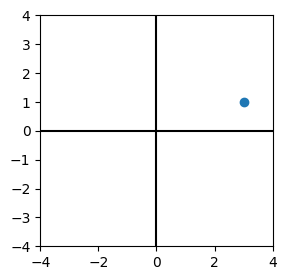

In [48]:
# Define and plot the vector h
h = np.array([[3],[1]])
plot(h)

If we rotate by 90 degrees anticlockwise around the center (also called the origin) of this graph, we get a new vector, $\textbf{h}^\prime = \left( \begin{array}{c} -1 \\ 3 \end{array} \right)$.

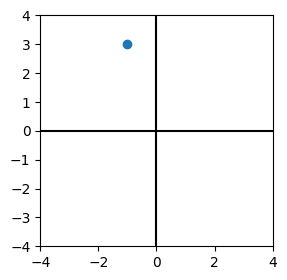

In [49]:
# Define and plot the rotated vector
hp = np.array([[-1],[3]])
plot(hp)

We can write down a matrix which describes this rotation:

$\textbf{R} = \left( \begin{array}{cc} 0 & -1 \\ 1 & 0 \end{array} \right)$

Multiplying any vector by this matrix is equivalent to rotating it by 90 degrees. Therefore, we should find that $\textbf{h}^\prime = \textbf{R}\textbf{h}$. Let's check this gets the result we expect.

[[-1]
 [ 3]]


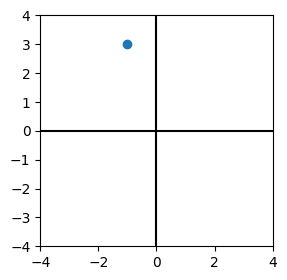

In [50]:
# Define a matrix which describes an anticlockwise rotation by 90 degrees
R = np.array([[0,-1],[1,0]])
# Calculate the rotated vector by multiplying the original vector by the matrix R
h_new = np.matmul(R,h)
# Print and plot the new vector
print(h_new)
plot(h_new)

The matrix $\textbf{R}$ can be applied to any vector:

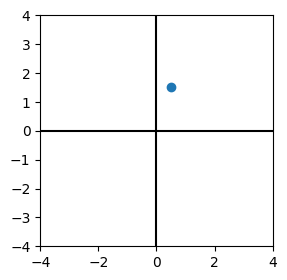

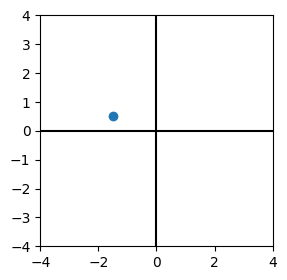

In [51]:
# Define and plot a new vector g
g = np.array([[0.5],[1.5]])
plot(g)
# Rotate the vector g and plot the result
gp = np.matmul(R,g)
plot(gp)

If we want to perform a different operation, we will need to define a new matrix. For example, the matrix

$\textbf{R}_y = \left( \begin{array}{cc} -1 & 0 \\ 0 & 1 \end{array} \right)$

describes reflection in the $y$ axis. Let's check this using our vectors $\textbf{g}$ and $\textbf{h}$:

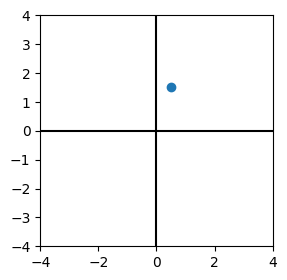

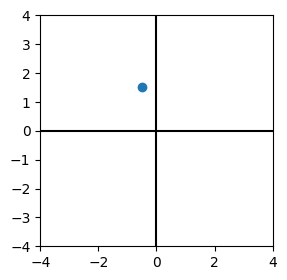

In [52]:
# Define a matrix which describes a reflection in the y axis
Ry = np.array([[-1,0],[0,1]])
# Reflect the vector g in the y axis
gp = np.matmul(Ry,g)
# Plot the original and reflected vector
plot(g)
plot(gp)

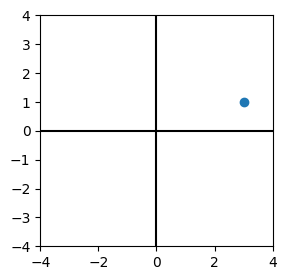

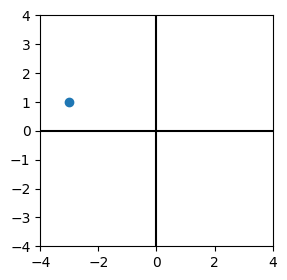

In [53]:
# Reflect the vector h in the y axis
hp = np.matmul(Ry,h)
# Plot the original and reflected vector
plot(h)
plot(hp)

### Combining Operations

If we want to do multiple transformations, we can do that just by applying the transformation matrices one after another. For example, to rotate a vector $\textbf{x}$ and then reflect it in the $y$ axis, we can write:

$\textbf{x}^\prime = \textbf{R}_y \textbf{R} \textbf{x}$.

This also shows we can combine two operations into a single matrix: the total transformation matrix $\textbf{T} = \textbf{R}_y \textbf{R}$. Let's check this by applying $\textbf{T}$ to $\textbf{h}$:

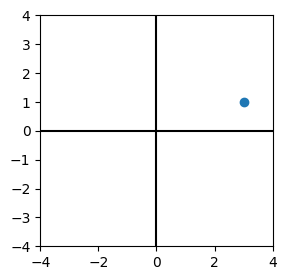

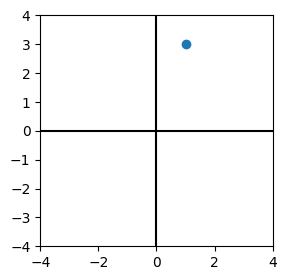

In [54]:
# Plot the vector h
plot(h)
# Define the combined operation matrix T
T = np.matmul(Ry,R)
# Apply the matrix T to the vector h
hp = np.matmul(T,h)
# Plot the transformed vector
plot(hp)

The order that we do these operations really matters - if we do things the other way around we get a different answer! Let's check that by defining $\textbf{U} = \textbf{R} \textbf{R}_y$ and by applying $\textbf{U}$ to $\textbf{h}$:

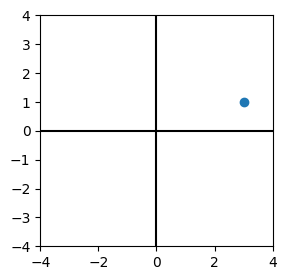

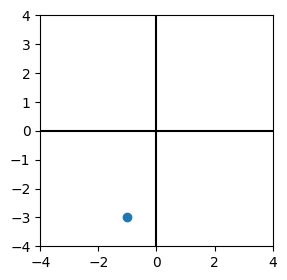

In [55]:
# Plot the vector h
plot(h)
# Define the combined operation matrix U
# The operatorions are applied in the opposite order than T
U = np.matmul(R,Ry)
# Apply the matrix U to the vector h
hp = np.matmul(U,h)
# Plot the transformed vector
plot(hp)

This shows a really important point about matrices - the order that we multiply them together matters. In general, $\textbf{AB} \neq \textbf{BA}$, and in our case here $\textbf{RR}_y \neq \textbf{R}_y\textbf{R}$:

In [56]:
print(T)
print(U)

[[0 1]
 [1 0]]
[[ 0 -1]
 [-1  0]]


### <font color='#3366CC'>Exercises

<font color='#3366CC'>**Exercise 1:** Define a matrix $\textbf{C}$ which describes a reflection in the line $y=-x$. Check your answer by multiplying the vector $\textbf{x} = \left( \begin{array}{c} 1 \\ 2 \end{array} \right)$ by $\textbf{C}$ and plotting the new vector on a graph.

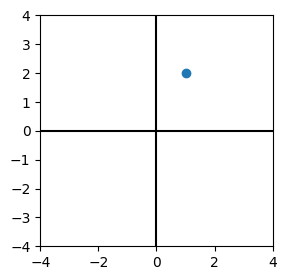

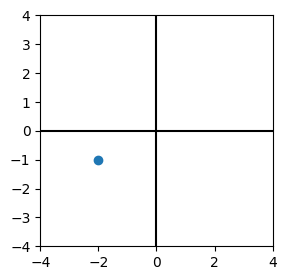

In [57]:
# Define and plot the vector x
x = np.array([[1],[2]])
plot(x)

C = np.array([[0,-1],[-1,0]])
cx = np.matmul(C,x)
plot(cx)

<font color='#3366CC'>**Exercise 2:** Define a matrix $\textbf{D}$ which describes a reflection in the line $y=-x$, followed by a reflection in the $y$ axis. Check your answer by multiplying the vector $\textbf{x} = \left( \begin{array}{c} 1 \\ 2 \end{array} \right)$ by $\textbf{D}$ and plotting the new vector on a graph.

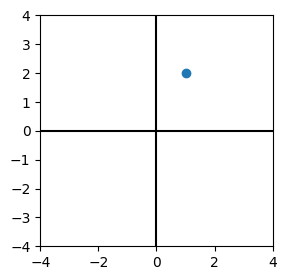

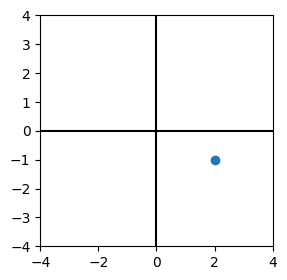

In [58]:
# Define and plot the vector x
x = np.array([[1],[2]])
plot(x)

D = np.matmul(Ry,C)
Dx = np.matmul(D,x)
plot(Dx)

<font color='#3366CC'>**Exercise 3:** Define a matrix $\textbf{F}$ which describes a reflection in the $y$ axis, followed by a reflection in the line $y=-x$. Check your answer by multiplying the vector $\textbf{x} = \left( \begin{array}{c} 1 \\ 2 \end{array} \right)$ by $\textbf{F}$ and plotting the new vector on a graph.

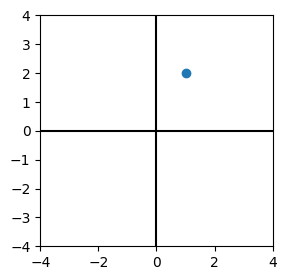

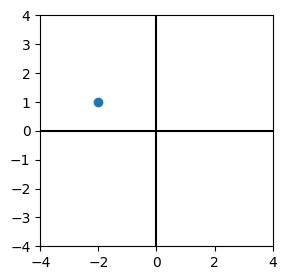

In [59]:
# Define and plot the vector x
x = np.array([[1],[2]])
plot(x)

F = np.matmul(C,Ry)
Fx = np.matmul(F,x)
plot(Fx)

### A Chemistry Example

In Year 2, you will be introduced to the idea of group theory. This involves defining matrices which describe coordinate transformations of orbitals, rather than transforming points on a graph.

As an example, we will take the same set of orbitals in the water molecule we thought about in the first example:

$\Big($O(1s), O(2s), O(2p$_x$), O(2p$_y$), O(2p$_z$), H$_1$(1s), H$_2$(1s)$\Big)$

There are four symmetry operations which leave water unchanged. One is called the identity operation, and does nothing to the molecule - it's boring. The other three are illustrated below: a rotation by 180 degrees (labelled C$_2$), a reflection in the blue plane, and a reflection in the red plane.

![image.png](https://water.lsbu.ac.uk/water/images/water_symmetry_1.gif)

We can represent each operation as a matrix which affects each of the orbitals in our set. For example, think about what happens when we reflect the orbitals in the blue plane. Most orbitals are not changed; the two hydrogen orbitals swap positions, and the O(2p$_x$) orbital changes sign. We can write a matrix which has this effect as follows:

$\textbf{R}_\textrm{blue} = \left( \begin{array}{ccccccc} 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & -1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 \\ \end{array} \right)$

If you're not sure, try multiplying the vector above by this matrix.

We can define a variable which describes this transformation:

In [60]:
# Create a 7x7 matrix full of zeros
ref_blue = np.zeros((7,7))

# Fill in the non-zero elements to match the matrix above
ref_blue[0,0] = 1
ref_blue[1,1] = 1
ref_blue[2,2] = -1
ref_blue[3,3] = 1
ref_blue[4,4] = 1
ref_blue[5,6] = 1
ref_blue[6,5] = 1

print(ref_blue)

[[ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.]]


<font color='#3366CC'>**Exercise 1:** Define matrices which describe how this basis is transformed by a rotation by 180 degrees (this is called a C$_2$ rotation), and by a reflection in the red plane.

In [61]:
ref_red = np.zeros((7,7))

ref_red[0,0] = 1
ref_red[1,1] = 1
ref_red[2,2] = 1
ref_red[3,3] = -1
ref_red[4,4] = 1
ref_red[5,5] = 1
ref_red[6,6] = 1

print(ref_red)

rot = np.zeros((7,7))

rot[0,0] = 1
rot[1,1] = 1
rot[2,2] = -1
rot[3,3] = -1
rot[4,4] = 1
rot[5,6] = 1
rot[6,5] = 1

print(rot)

[[ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]]
[[ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.]]


<font color='#3366CC'>**Exercise 2:** Group theory says that any combination of symmetry operations must be the same as one of the symmetry operations in the group (this can be the identity). Use the matrices you have just defined to prove that this is true for this example.

In [65]:
print(np.matmul(ref_blue,ref_red))
print(np.matmul(ref_blue,rot))
print(np.matmul(ref_red,rot))

print((np.matmul(ref_blue,ref_red)==rot).all())
print((np.matmul(ref_blue,rot)==ref_red).all())
print((np.matmul(ref_red,rot)==ref_blue).all())

[[ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.]]
[[ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]]
[[ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.]]
True
True
True


<font color='#3366CC'>**Exercise 3:** Often in group theory, we calculate the trace of these coordinate transformation matrices, and use that trace rather than the full matrix to describe the transformation. Calculate the trace of each of your matrices.

In [63]:
print(np.trace(ref_red))
print(np.trace(ref_blue))
print(np.trace(rot))

5.0
3.0
1.0
